## Homework:

### DataFrame 1: Student Grades

In [13]:
import pandas as pd

data1 = {
    'Student_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Math': [85, 90, 78, 92, 88, 95, 89, 79, 83, 91],
    'English': [78, 85, 88, 80, 92, 87, 90, 84, 79, 88],
    'Science': [90, 92, 85, 88, 94, 79, 83, 91, 87, 89]
}  

df1 = pd.DataFrame(data1)

Exercise 1: Calculate the average grade for each student.

Exercise 2: Find the student with the highest average grade.

Exercise 3: Create a new column 'Total' representing the total marks obtained by each student.

Exercise 4: Plot a bar chart to visualize the average grades in each subject.

In [ ]:
#1
df1['avg_score'] = df1[['Math', 'English', 'Science']].mean(axis=1)


dict_avg_scr = df1.set_index('Student_ID')['avg_score'].to_dict()

print(dict_avg_scr)

{1: 84.33333333333333, 2: 89.0, 3: 83.66666666666667, 4: 86.66666666666667, 5: 91.33333333333333, 6: 87.0, 7: 87.33333333333333, 8: 84.66666666666667, 9: 83.0, 10: 89.33333333333333}


In [33]:
#2
top_score = max(dict_avg_scr.values())
top_student = tuple(student for student, score in dict_avg_scr.items() if score == top_score) 
print(top_student , top_score)

(5,) 91.33333333333333


In [35]:
#3
df1['Total'] = df1[['Math', 'English', 'Science']].sum(axis=1)
df1

,Student_ID,Math,English,Science,Average_Score,avg_score,Total
0,1,85,78,90,84.333333,84.333333,253
1,2,90,85,92,89.000000,89.000000,267
2,3,78,88,85,83.666667,83.666667,251
3,4,92,80,88,86.666667,86.666667,260
4,5,88,92,94,91.333333,91.333333,274
5,6,95,87,79,87.000000,87.000000,261
6,7,89,90,83,87.333333,87.333333,262
7,8,79,84,91,84.666667,84.666667,254
8,9,83,79,87,83.000000,83.000000,249
9,10,91,88,89,89.333333,89.333333,268


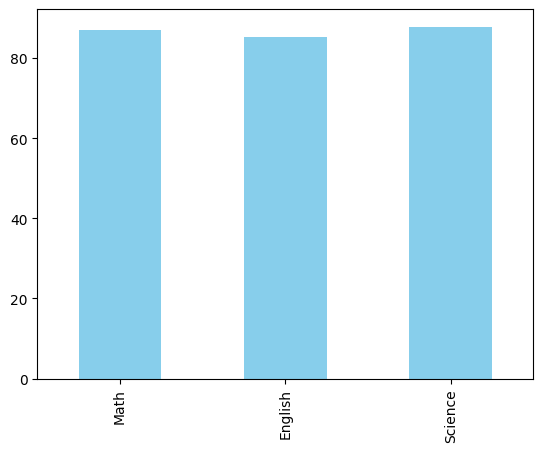

In [ ]:
#4
import matplotlib.pyplot as plt

subject_avg = df1[['Math', 'English', 'Science']].mean()
subject_avg.plot(kind='bar', color='skyblue', width=0.5)

plt.show()

### DataFrame 2: Sales Data

In [55]:
import pandas as pd

data2 = {
    'Date': pd.date_range(start='2023-01-01', periods=10),
    'Product_A': [120, 150, 130, 110, 140, 160, 135, 125, 145, 155],
    'Product_B': [90, 110, 100, 80, 95, 105, 98, 88, 102, 112],
    'Product_C': [75, 80, 85, 70, 88, 92, 78, 82, 87, 90]
}

df2 = pd.DataFrame(data2)

Exercise 1: Calculate the total sales for each product.

Exercise 2: Find the date with the highest total sales.

Exercise 3: Calculate the percentage change in sales for each product from the previous day.

Exercise 4: Plot a line chart to visualize the sales trends for each product over time.

In [ ]:
#1
df2['Total_sales'] = df2[['Product_A', 'Product_B', 'Product_C']].sum(axis=1)
df2

,Date,Product_A,Product_B,Product_C,Total_sales
0,2023-01-01,120,90,75,285
1,2023-01-02,150,110,80,340
2,2023-01-03,130,100,85,315
3,2023-01-04,110,80,70,260
4,2023-01-05,140,95,88,323
5,2023-01-06,160,105,92,357
6,2023-01-07,135,98,78,311
7,2023-01-08,125,88,82,295
8,2023-01-09,145,102,87,334
9,2023-01-10,155,112,90,357


In [67]:
#2
highest_ts = df2['Total_sales'].max()
for index, row in df2.iterrows():
    if row['Total_sales'] == highest_ts:
        print(row['Date'], highest_ts)

2023-01-06 00:00:00 357
2023-01-10 00:00:00 357


In [71]:
#3
pct_change = pd.DataFrame(index = df2.index,columns = ['Product_A_pct_ch', 'Product_B_pct_ch', 'Product_C_pct_ch'])
for c in ['Product_A', 'Product_B', 'Product_C']:
    for i in range(1, len(df2)):
        old_value = df2[c].iloc[i-1]
        new_value = df2[c].iloc[i]
        pct_change[c + '_pct_ch'].iloc[i] = ((new_value - old_value)/old_value)*100
print(df2)
print(pct_change)        

            Product_A  Product_B  Product_C  Total_sales
Date                                                    
2023-01-01        120         90         75          285
2023-01-02        150        110         80          340
2023-01-03        130        100         85          315
2023-01-04        110         80         70          260
2023-01-05        140         95         88          323
2023-01-06        160        105         92          357
2023-01-07        135         98         78          311
2023-01-08        125         88         82          295
2023-01-09        145        102         87          334
2023-01-10        155        112         90          357
           Product_A_pct_ch Product_B_pct_ch Product_C_pct_ch
Date                                                         
2023-01-01              NaN              NaN              NaN
2023-01-02             25.0        22.222222         6.666667
2023-01-03       -13.333333        -9.090909             6.25
2023-0

C:\Users\Dell\AppData\Local\Temp\ipykernel_26692\379160028.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pct_change[c + '_pct_ch'].iloc[i] = ((new_value - old_value)/old_value)*100


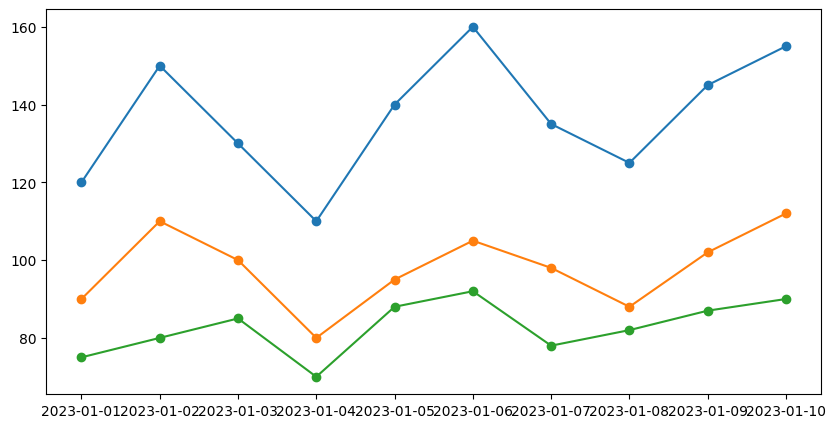

In [109]:
#4
plt.figure(figsize=(10, 5))
for column in ['Product_A', 'Product_B', 'Product_C']:
    plt.plot(df2.index, df2[column], marker='o', label=column)

### DataFrame 3: Employee Information

In [75]:
import pandas as pd

data3 = {
    'Employee_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Hank', 'Ivy', 'Jack'],
    'Department': ['HR', 'IT', 'Marketing', 'IT', 'Finance', 'HR', 'Marketing', 'IT', 'Finance', 'Marketing'],
    'Salary': [60000, 75000, 65000, 80000, 70000, 72000, 68000, 78000, 69000, 76000],
    'Experience (Years)': [3, 5, 2, 8, 4, 6, 3, 7, 2, 5]
}

df3 = pd.DataFrame(data3)

Exercise 1: Calculate the average salary for each department.

Exercise 2: Find the employee with the most experience.

Exercise 3: Create a new column 'Salary Increase' representing the percentage increase in salary from the minimum salary in the dataframe.

Exercise 4: Plot a bar chart to visualize the distribution of employees across different departments.

Department
Finance      69500.000000
HR           66000.000000
IT           77666.666667
Marketing    69666.666667
Name: Salary, dtype: float64
David 8
   Employee_ID     Name Department  Salary  Experience (Years)  \
0          101    Alice         HR   60000                   3   
1          102      Bob         IT   75000                   5   
2          103  Charlie  Marketing   65000                   2   
3          104    David         IT   80000                   8   
4          105     Emma    Finance   70000                   4   
5          106    Frank         HR   72000                   6   
6          107    Grace  Marketing   68000                   3   
7          108     Hank         IT   78000                   7   
8          109      Ivy    Finance   69000                   2   
9          110     Jack  Marketing   76000                   5   

   Salary Increase  
0         0.000000  
1        25.000000  
2         8.333333  
3        33.333333  
4        16.6666

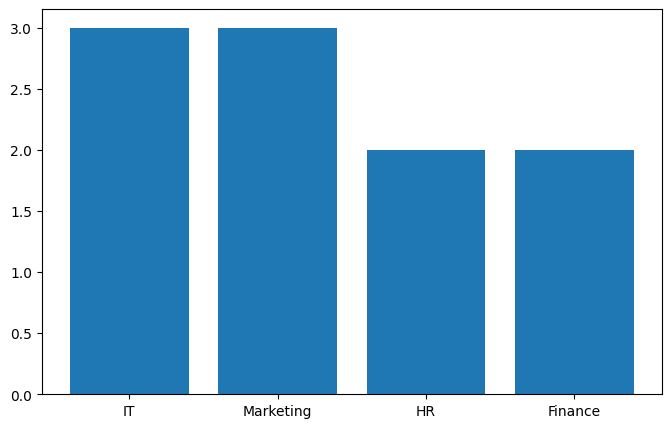

In [91]:
#1
df3
avg_salaries = df3.groupby('Department')['Salary'].mean()
print(avg_salaries)

#2
max_exp = df3['Experience (Years)'].max()
for index, row in df3.iterrows():
    if row['Experience (Years)'] == max_exp:
        print(row['Name'], max_exp)

#3
min_sal = df3['Salary'].min()
df3['Salary Increase'] = ((df3['Salary'] - min_sal) / min_sal) * 100
print(df3)

#4
dep_counts = df3['Department'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(dep_counts.index, dep_counts.values)
plt.show()

### DataFrame 4: Customer Orders

In [93]:
import pandas as pd

data4 = {
    'Order_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Customer_ID': [201, 202, 203, 204, 205, 206, 207, 208, 209, 210],
    'Product': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'C', 'B', 'A'],
    'Quantity': [2, 3, 1, 4, 2, 3, 2, 5, 1, 3],
    'Total_Price': [120, 180, 60, 240, 160, 270, 140, 300, 90, 180]
}

df4 = pd.DataFrame(data4)

Exercise 1: Calculate the total revenue from all orders.

Exercise 2: Find the most ordered product.

Exercise 3: Calculate the average quantity of products ordered.

Exercise 4: Plot a pie chart to visualize the distribution of sales across different products.

1740
Most ordered product: A
Number of orders:  4
Product
A    2.0
B    2.0
C    4.0
Name: Quantity, dtype: float64


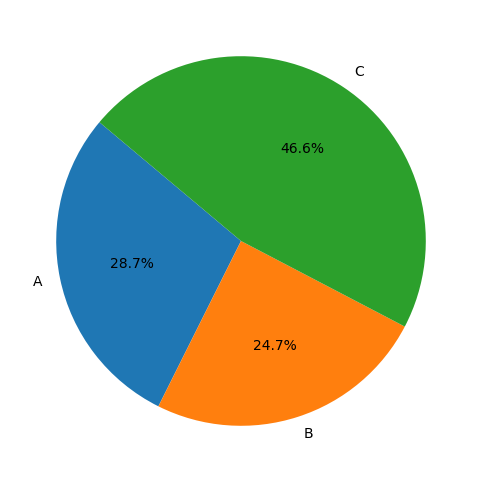

In [108]:
#1
total_rev = df4['Total_Price'].sum()
print(total_rev)

#2
most_ord = df4['Product'].value_counts().idxmax()
most_ord_count = df4['Product'].value_counts().max()
print('Most ordered product: '  +most_ord)
print('Number of orders: ', most_ord_count)

#3
gr_avg = df4.groupby('Product')['Quantity'].mean()
print(gr_avg)

#4
sales_dist = df4.groupby('Product')['Total_Price'].sum()

plt.figure(figsize=(8, 6))
plt.pie(sales_dist, labels=sales_dist.index, autopct='%1.1f%%', startangle=140)
plt.show()